# Tanzania Water Wells

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [51]:
# loading the dataset using the compression zip
data_values = pd.read_csv('./Data/training_Set_values.csv.zip',compression='zip') # Training set
data_labels = pd.read_csv('./Data/training_Set_labels.csv.zip', compression='zip') # Training set labels


In [52]:
# display dataset
data_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [53]:
# display the first 5 rows of the labels
data_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [54]:
# Create a combined DataFrame with both the value and label data joined on the 'id' column
df = pd.merge(data_values, data_labels, on='id')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [55]:
# helper function for shape of the data 

def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns", '\n')

    return out

In [56]:
# helper function for info of the data 

def data_info(data):
    """Simple function to provide the info of the data"""
    out = print(data.info(), '\n')
    
    return out

In [57]:
def print_column_types(data):
    """Print categorical and numerical columns in a dataset"""
    # Identify categorical and numerical columns
    categorical_cols = []
    numerical_cols = []
    
    for column in data.columns:
        if data[column].dtype == 'object':
            categorical_cols.append(column)
        else:
            numerical_cols.append(column)
    
    # Print categorical columns
    out = print(f"Categorical Columns:", categorical_cols,'\n')
     
    # Print numerical columns
    out = print(f"Numerical Columns:", numerical_cols,'\n')
    
    return out 

In [58]:
# helper function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [59]:
# helper function to check for descriptive stats

def data_describe(data):
    """Simple function to check the descriptive values of the data"""
    out = print(data.describe(), '\n')
    
    return out

In [60]:
# helper function to check for unique values in a column
def get_unique_values(data):
        out = print(data.nunique(),'\n')
        return out

In [61]:
# overall function for data understanding

def explore(data):
    """Group of functions to explore data """
    out1 = data_shape(data)
    out2 = data_info(data)
    out3 = print_column_types(data)
    out4 = data_describe(data)
    
    return out1, out2, out3, out4

In [62]:
explore(df)

The DataFrame has:
	* 59400 rows
	* 41 columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  distr

(None, None, None, None)

In [63]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

The data has 59,400 rows and 40 columns, 9 numeric ones and 31 categorical ones.



# Data Preparation

A number of the features overlap, including waterpoint_type and waterpoint_type_group as well as extraction_type, extraction_type_group, and extraction_type_class (a description of all features can be found [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/)). Due to the same information being represented at several levels, these would cause multicollinearity concerns, hence in order to decrease the dimensionality of the data, the most generic columns for each overlapped column were retained. 

Also, several features, such 'num_private' lacked feature descriptions that explained what they were, so I decided not to use them.


"**extraction_type**" , "**extraction_type_group**" and  "**extraction_type_class**" columns

In [64]:
# Group the data by the extraction_type, extraction_type_group, and extraction_type_class
df.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type']).size()


extraction_type_class  extraction_type_group  extraction_type          
gravity                gravity                gravity                      26780
handpump               afridev                afridev                       1770
                       india mark ii          india mark ii                 2400
                       india mark iii         india mark iii                  98
                       nira/tanira            nira/tanira                   8154
                       other handpump         other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
                       swn 80                 swn 80                        3670
motorpump              mono                   mono                          2865
                       other motorpum

I intend to use the 'extraction_type_class' column in this particular instance since it has fewer distinctive values than the 'extraction_type' column and is more descriptive than the 'extraction_type_class' column. 


'**water_quality**' and '**quality_group columns**'

In [65]:
df.groupby(['quality_group', 'water_quality']).size()

quality_group  water_quality     
colored        coloured                490
fluoride       fluoride                200
               fluoride abandoned       17
good           soft                  50818
milky          milky                   804
salty          salty                  4856
               salty abandoned         339
unknown        unknown                1876
dtype: int64

Compared to the "quality_group" column, the "water_quality" column has more distinct values. The change is not that significant, though. Consequently, since the quality_group field includes fewer information, I will drop it.


'**source**' , '**source_type**' and '**source_class**' columns

In [66]:
df.groupby(['source_class', 'source_type', 'source']).size()

source_class  source_type           source              
groundwater   borehole              hand dtw                  874
                                    machine dbh             11075
              shallow well          shallow well            16824
              spring                spring                  17021
surface       dam                   dam                       656
              rainwater harvesting  rainwater harvesting     2295
              river/lake            lake                      765
                                    river                    9612
unknown       other                 other                     212
                                    unknown                    66
dtype: int64

The three features have the same information but source is the most detailed of the three so I dropped the rest.

**payment** and **payment_type** columns

In [67]:
df.groupby(['payment_type', 'payment']).size()

payment_type  payment              
annually      pay annually              3642
monthly       pay monthly               8300
never pay     never pay                25348
on failure    pay when scheme fails     3914
other         other                     1054
per bucket    pay per bucket            8985
unknown       unknown                   8157
dtype: int64

These two columns are same so I decided to drop one of them.

**waterpoint_type** and **waterpoint_type_group**

In [68]:
df.groupby(['waterpoint_type_group',  'waterpoint_type']).size()

waterpoint_type_group  waterpoint_type            
cattle trough          cattle trough                    116
communal standpipe     communal standpipe             28522
                       communal standpipe multiple     6103
dam                    dam                                7
hand pump              hand pump                      17488
improved spring        improved spring                  784
other                  other                           6380
dtype: int64

I decided to keep 'waterpoint_type' which contains more detail.

**scheme_management** , **management** and **management_group** columns

In [69]:
df['scheme_management'].value_counts(dropna=False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [70]:
df.groupby(['management_group', 'management']).size()

management_group  management      
commercial        company               685
                  private operator     1971
                  trust                  78
                  water authority       904
other             other                 844
                  other - school         99
parastatal        parastatal           1768
unknown           unknown               561
user-group        vwc                 40507
                  water board          2933
                  wua                  2535
                  wug                  6515
dtype: int64

I can tell that 'scheme_management' and 'management' are interrelated. The 'management_group' column, however, has little relationship to the other two columns and has less unique values overall. Compared to 'management', 'scheme_management' has  missing data, as can be seen. Working with 'management 'rather than 'scheme_management' would therefore be preferable. Despite the fact that management_group has fewer unique values than management. Some aspects of the management column are arbitrary. I thus dropped the management column.


'**quantity**' and '**quantity_group**' columns 

In [71]:
df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

Both columns are exactly similar. I will drop the 'quantity_group' column.

In [72]:
# Removing columns that are non-factors for our model
col_to_drop = ['id', 'recorded_by', 'public_meeting', 'installer', 'funder',
                'ward', 'longitude', 'latitude', 'region_code', 'district_code', 
                 'wpt_name','scheme_name', 'extraction_type', 'extraction_type_group',
                 'payment', 'quality_group', 'source', 'source_class', 'quantity_group', 
                 'scheme_management', 'management', 'waterpoint_type_group',
                   'subvillage', 'num_private']

In [73]:
dfn = df.drop(col_to_drop, axis = 1)
dfn.shape

(59400, 17)

In [74]:
print_column_types(dfn)

Categorical Columns: ['date_recorded', 'basin', 'region', 'lga', 'permit', 'extraction_type_class', 'management_group', 'payment_type', 'water_quality', 'quantity', 'source_type', 'waterpoint_type', 'status_group'] 

Numerical Columns: ['amount_tsh', 'gps_height', 'population', 'construction_year'] 



Our new dataframe has 4 numerical columns and 14 categorical columns.

# Data Cleaning

##### Missing values

In [75]:
# helper function to check for missing values

def data_missing(data):
    """Identify if the data has missing values"""
    # identify columns with missing values
    missing_cols = data.columns[data.isnull().any()]
    # calculate number of missing values in each column
    missing_sum = data[missing_cols].isnull().sum()
    # calculate percentage of missing values in each column
    missing_pct = data[missing_cols].isnull().sum() / data.shape[0] * 100

    # check if there are missing values
    if len(missing_cols) == 0:
        out = print("The data has no missing values.")
    else:
        out = print(f"The data has missing values in the following columns:\n{missing_cols}\n\nThe total number of missing values in each column:\n{missing_sum}\n \n{missing_pct}\n")
    return out

In [76]:
data_missing(dfn)

The data has missing values in the following columns:
Index(['permit'], dtype='object')

The total number of missing values in each column:
permit    3056
dtype: int64
 
permit    5.144781
dtype: float64



There are missing values in two columns, 'installer' and 'permit'. I intend to drop them since they only account to a very small percentage (6% and 5% respectively) of the entire columns.

In [77]:
# Drop the missing values
dfn.dropna(axis=0, subset=['permit'], inplace=True)

### Duplicated data

Duplicated data refers to instances where the same data entry appears more than once in a dataset. This duplication can occur due to various reasons, such as data collection errors, merging of datasets, or system issues. It is important to understand that duplicated data is not necessarily incorrect or invalid, as it can occur naturally in certain scenarios.

However, when working with duplicated data, it is crucial to be cautious of its potential impact on the analysis or modeling process. Duplicated data can introduce bias and affect the accuracy of statistical analyses or machine learning models. In particular, it can lead to overfitting, where the model becomes too specialized to the duplicated data and performs poorly on new, unseen data.

In [78]:
# helper function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [79]:
identify_duplicates(dfn)

The Data has 10269 duplicated rows.
This constitutes 18.226% of the data set. 



The dataset has duplicates but we will retain them.

### Outliers

In [80]:
import random

def evaluate_outliers(data, sample_size=1000):
    """Function to evaluate outliers in numeric columns and plot their distributions"""
    
    # Select numeric columns
    numeric_columns = data.select_dtypes(include='number').columns
    
    # Randomly sample the data
    data_sample = data.sample(n=sample_size, random_state=42)
    
    # Iterate over numeric columns
    for column in numeric_columns:
        # Plot boxplot for the column
        plt.figure(figsize=(10, 2))
        plt.boxplot(data_sample[column], notch=True, sym='r.')
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.title(f'Boxplot of {column}')
        plt.show()


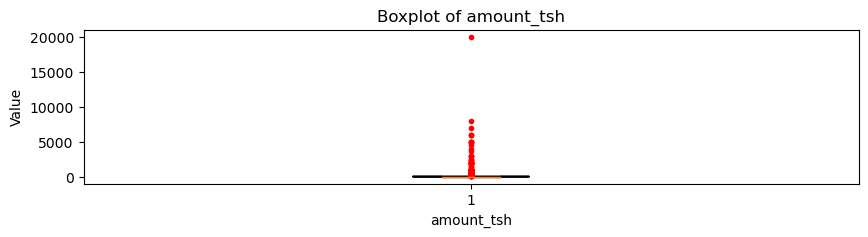

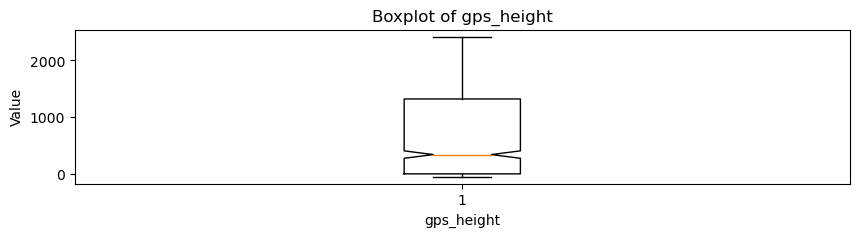

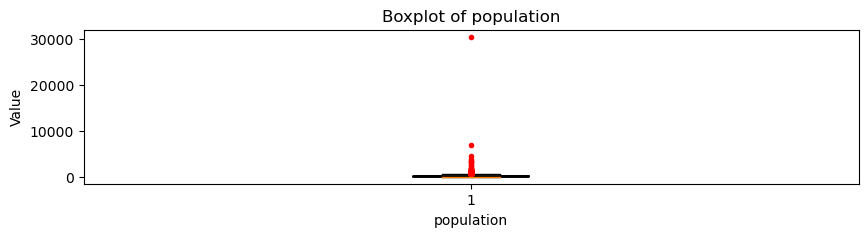

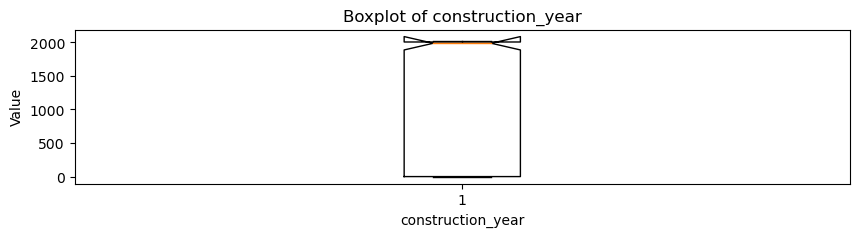

In [81]:
evaluate_outliers(dfn)

Three numeric colmns have outliers but  will work with them.

In [82]:
dfn.columns

Index(['amount_tsh', 'date_recorded', 'gps_height', 'basin', 'region', 'lga',
       'population', 'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'water_quality', 'quantity',
       'source_type', 'waterpoint_type', 'status_group'],
      dtype='object')

### Data Formating and Labeling

In [83]:
def rename_and_format_columns(df, column_mapping):
    """
    This function renames and formats the columns of a DataFrame based on the provided mapping.
    The mapping should be a dictionary where the keys are the current column names and the values are the desired new names.
    """
    for old_col, new_col in column_mapping.items():
        new_col = new_col.strip().replace(' ', '_').lower()
        df.rename(columns={old_col: new_col}, inplace=True)

# Example usage:
column_mapping = {
    'lga': 'local_government_area',
    'Column Name 1': 'new_column_1',
    'Column Name 2': 'new_column_2',
}

rename_and_format_columns(dfn, column_mapping)


In [84]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56344 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             56344 non-null  float64
 1   date_recorded          56344 non-null  object 
 2   gps_height             56344 non-null  int64  
 3   basin                  56344 non-null  object 
 4   region                 56344 non-null  object 
 5   local_government_area  56344 non-null  object 
 6   population             56344 non-null  int64  
 7   permit                 56344 non-null  object 
 8   construction_year      56344 non-null  int64  
 9   extraction_type_class  56344 non-null  object 
 10  management_group       56344 non-null  object 
 11  payment_type           56344 non-null  object 
 12  water_quality          56344 non-null  object 
 13  quantity               56344 non-null  object 
 14  source_type            56344 non-null  object 
 15  wa

Setting up a new column with construction decades and changing 'date_recorded' column to datetime

In [85]:
import pandas as pd

def preprocess_data(df):
    # Change "date_recorded" to datetime
    df['date_recorded'] = pd.to_datetime(df['date_recorded'])

    # Create a list of boundaries for each decade
    decade_bins = [1960, 1970, 1980, 1990, 2000, 2010, 2021]

    # Create a list of labels for each decade, including the range of years
    decade_labels = [f'{decade}s ({decade}-{decade+9})' for decade in decade_bins[:-1]]

    # Bin "construction_year" into decades with custom labels
    df['construction_decade'] = pd.cut(df['construction_year'], bins=decade_bins, labels=decade_labels)

    # Convert "construction_decade" column to object (string) data type
    df['construction_decade'] = df['construction_decade'].astype('object')

    # Assign "Unknown" label to construction years with a value of 0
    df.loc[df['construction_year'] == 0, 'construction_decade'] = 'Unknown'

    # Fill missing values with a specified value, such as "Unknown"
    df['construction_decade'].fillna('Unknown', inplace=True)

    
    
    # Convert object columns to categorical
    # object_cols = df.select_dtypes(include=['object']).columns
    # df[object_cols] = df[object_cols].astype('category')
    
    return df


In [86]:
preprocess_data(dfn)

,amount_tsh,date_recorded,gps_height,basin,region,local_government_area,population,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,waterpoint_type,status_group,construction_decade
0,6000.0,2011-03-14,1390,Lake Nyasa,Iringa,Ludewa,109,False,1999,gravity,user-group,annually,soft,enough,spring,communal standpipe,functional,1990s (1990-1999)
1,0.0,2013-03-06,1399,Lake Victoria,Mara,Serengeti,280,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,2000s (2000-2009)
2,25.0,2013-02-25,686,Pangani,Manyara,Simanjiro,250,True,2009,gravity,user-group,per bucket,soft,enough,dam,communal standpipe multiple,functional,2000s (2000-2009)
3,0.0,2013-01-28,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,True,1986,submersible,user-group,never pay,soft,dry,borehole,communal standpipe multiple,non functional,1980s (1980-1989)
4,0.0,2011-07-13,0,Lake Victoria,Kagera,Karagwe,0,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,1210,Pangani,Kilimanjaro,Hai,125,True,1999,gravity,user-group,per bucket,soft,enough,spring,communal standpipe,functional,1990s (1990-1999)
59396,4700.0,2011-05-07,1212,Rufiji,Iringa,Njombe,56,True,1996,gravity,user-group,annually,soft,enough,river/lake,communal standpipe,functional,1990s (1990-1999)
59397,0.0,2011-04-11,0,Rufiji,Mbeya,Mbarali,0,False,0,handpump,user-group,monthly,fluoride,enough,borehole,hand pump,functional,Unknown
59398,0.0,2011-03-08,0,Rufiji,Dodoma,Chamwino,0,True,0,handpump,user-group,never pay,soft,insufficient,shallow well,hand pump,functional,Unknown


# EDA

##### Numerical Columns

In [87]:
def analyze_numeric_columns(dataframe):
    # Get the numeric columns
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64'])

    # Describe statistics of numeric columns
    statistics = numeric_columns.describe()
    print(statistics)

    # Plot distributions of numeric columns
    for column in numeric_columns.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(dataframe[column], kde=True, bins=20)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

          amount_tsh    gps_height    population  construction_year
count   56344.000000  56344.000000  56344.000000       56344.000000
mean      322.126009    656.737789    179.866587        1302.952116
std      2649.689666    690.373003    464.777124         950.936623
min         0.000000    -90.000000      0.000000           0.000000
25%         0.000000      0.000000      0.000000           0.000000
50%         0.000000    352.000000     30.000000        1986.000000
75%        30.000000   1301.000000    220.000000        2004.000000
max    250000.000000   2770.000000  30500.000000        2013.000000


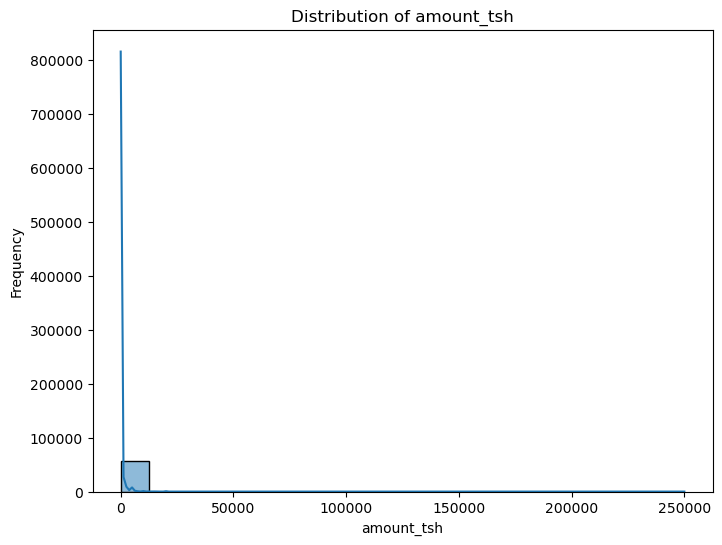

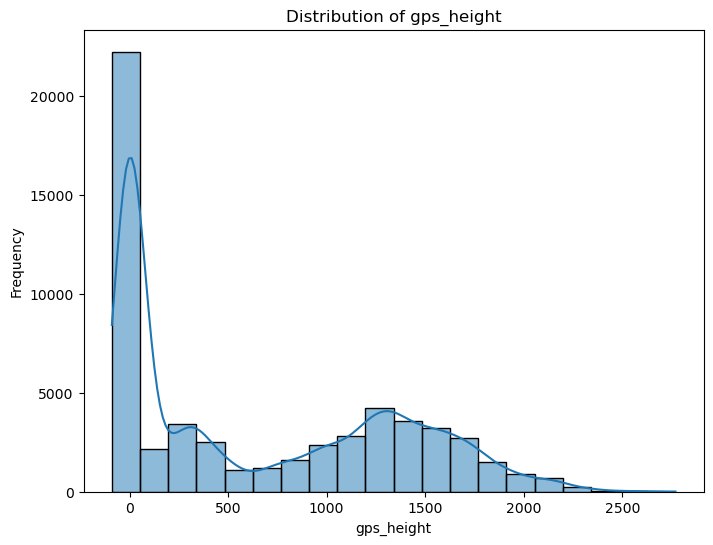

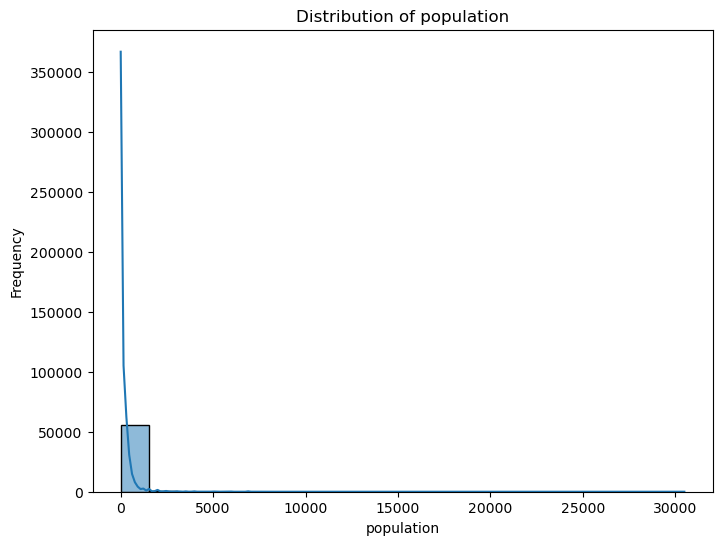

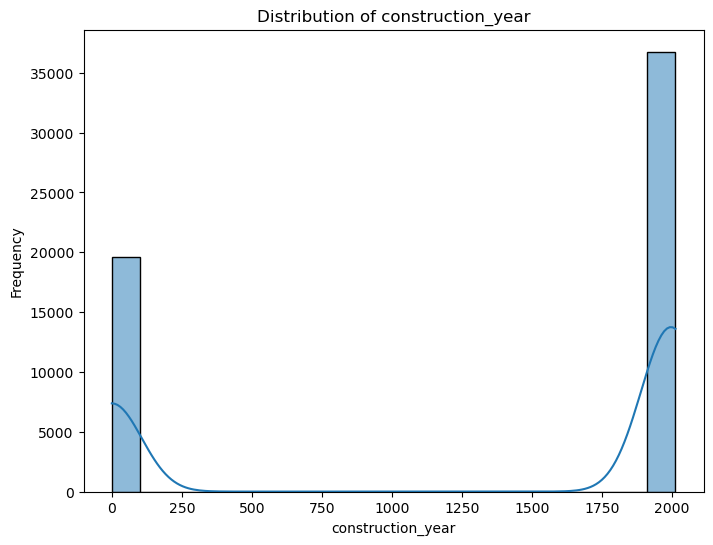

In [88]:
analyze_numeric_columns(dfn)


Based on the provided statistics of the numeric columns, here are some observations:

**amount_tsh**: The majority of values are zero (minimum is zero and 25th percentile is zero). The mean is relatively low at 326.6, but there is a high standard deviation of 2670.7, indicating a wide range of values. There is a large maximum value of 250,000.

**gps_height**: The minimum value is -90, indicating the presence of negative values. The mean height is 669.98, with a standard deviation of 690.94. The distribution appears to have a right skew, as the median (50th percentile) is lower than the mean.

**population**: Similar to amount_tsh, the majority of values are zero (minimum is zero and 25th percentile is zero). The mean population is 182.67, with a standard deviation of 467.57. The maximum value is relatively high at 30,500.

**construction_year**: There are many zero values in this column, which might represent unknown data. The mean year is 1330.36, which seems to be an incorrect value. The standard deviation is 941.72, indicating a wide range of years. The minimum year is zero, which aligns with the presence of zero values in the column.










##### Categorical Columns

In this section, I am evaluating the empirical relationship between the features columns and  our target column **status_group**

In [89]:
def plot_categorical_distribution(dataframe, column):
    if column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            plt.figure(figsize=(12, 6))
            top_categories = dataframe[column].value_counts().nlargest(20).index
            sns.countplot(data=dataframe, x=column, hue='status_group', order=top_categories)
            plt.title(f"Distribution of {column} by status_group")
            plt.xlabel(column)
            plt.xticks(rotation=90)
            plt.legend(title='status_group')
            plt.show()

**region**

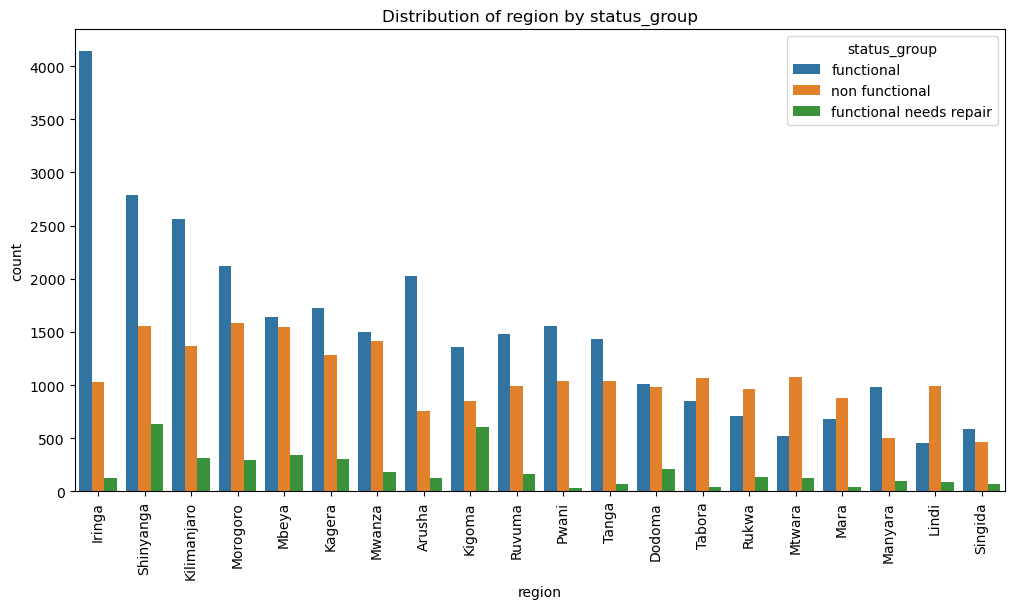

In [90]:
plot_categorical_distribution(dfn, 'region')

**local_government_area**

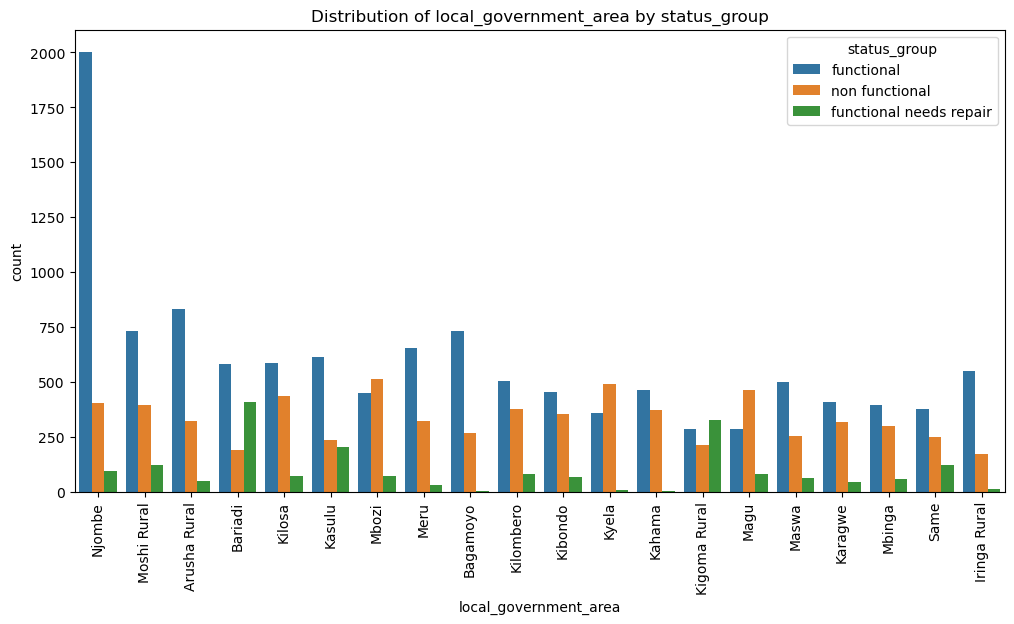

In [100]:
plot_categorical_distribution(dfn, 'local_government_area')

**construction_decade**

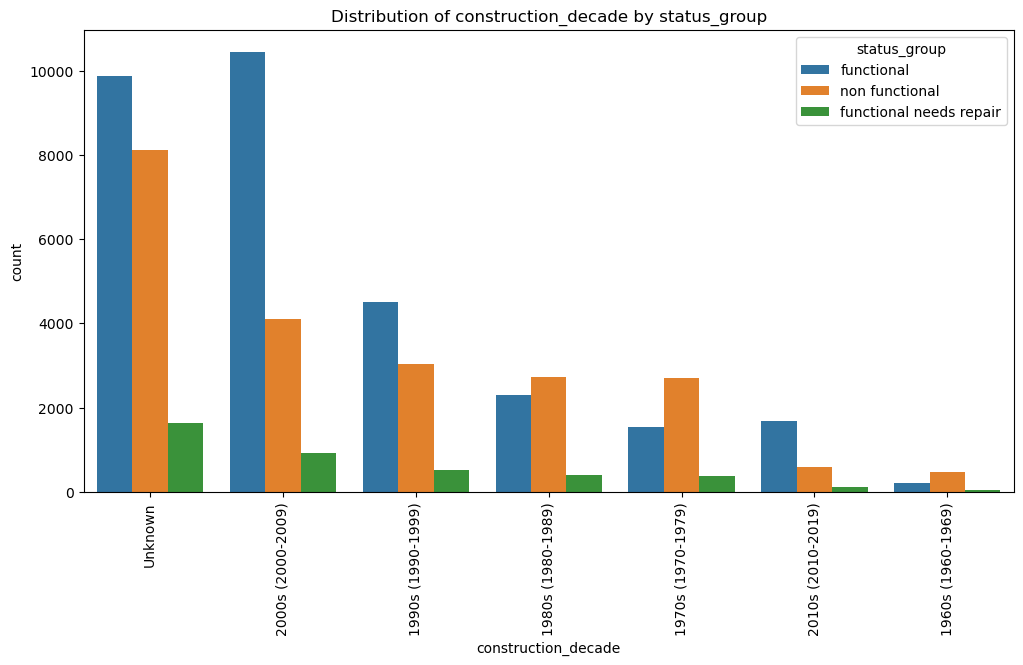

In [101]:
plot_categorical_distribution(dfn, 'construction_decade')

**basin**

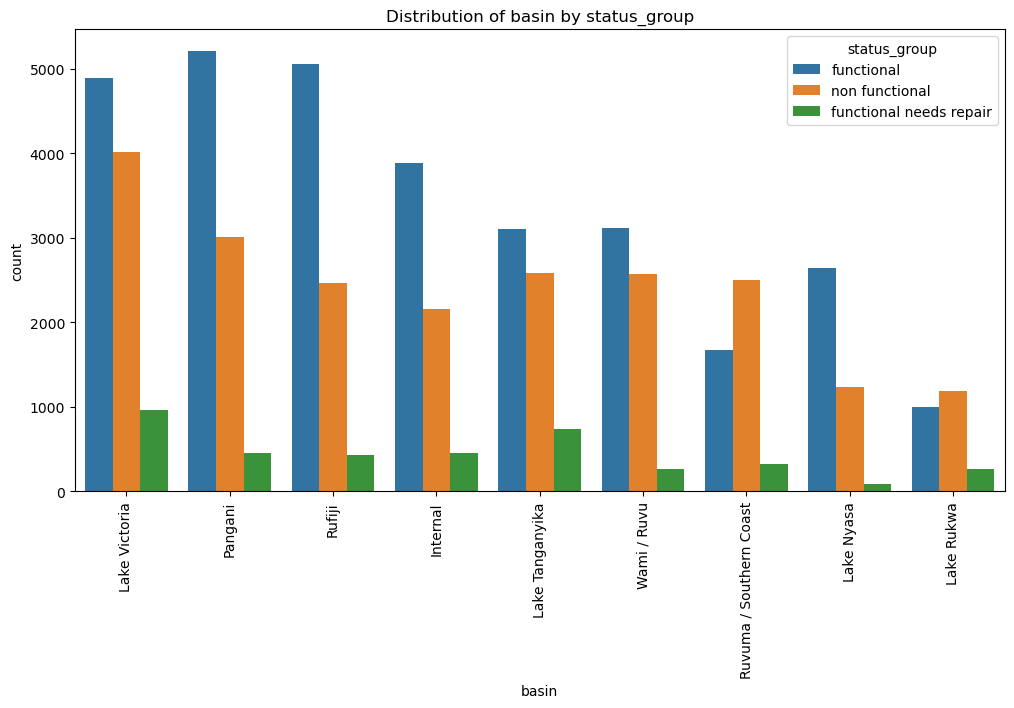

In [91]:
plot_categorical_distribution(dfn, 'basin')

**permit**

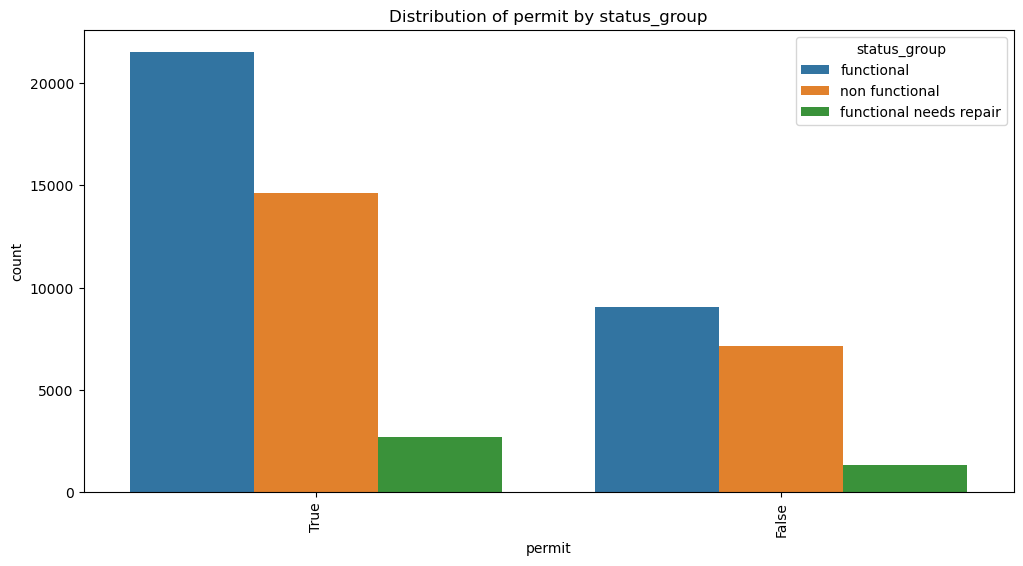

In [92]:
plot_categorical_distribution(dfn, 'permit')

**extraction_type_class**

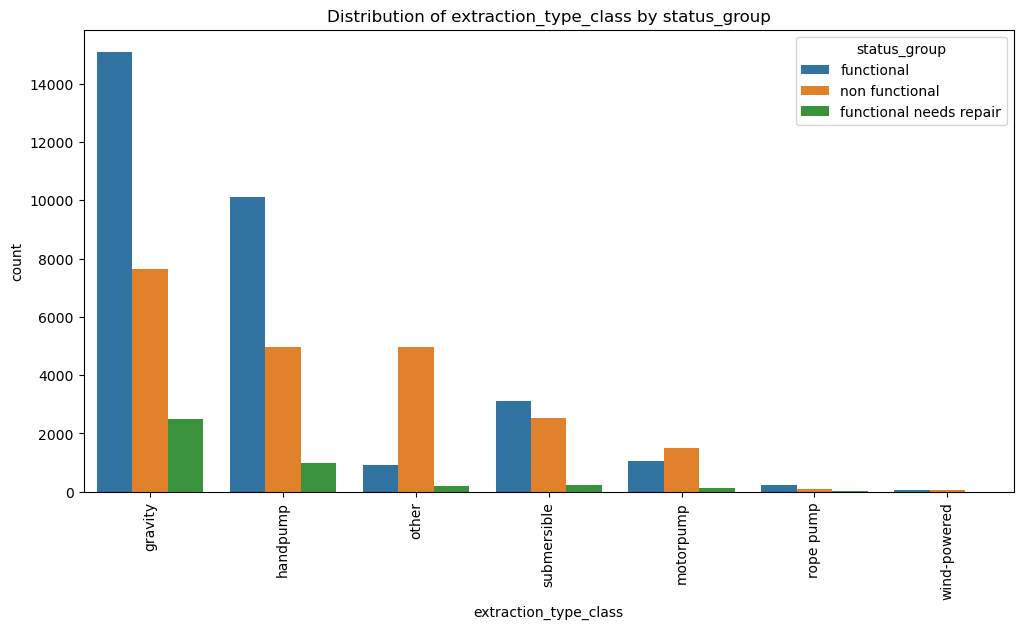

In [93]:
plot_categorical_distribution(dfn, 'extraction_type_class')

**management_group**

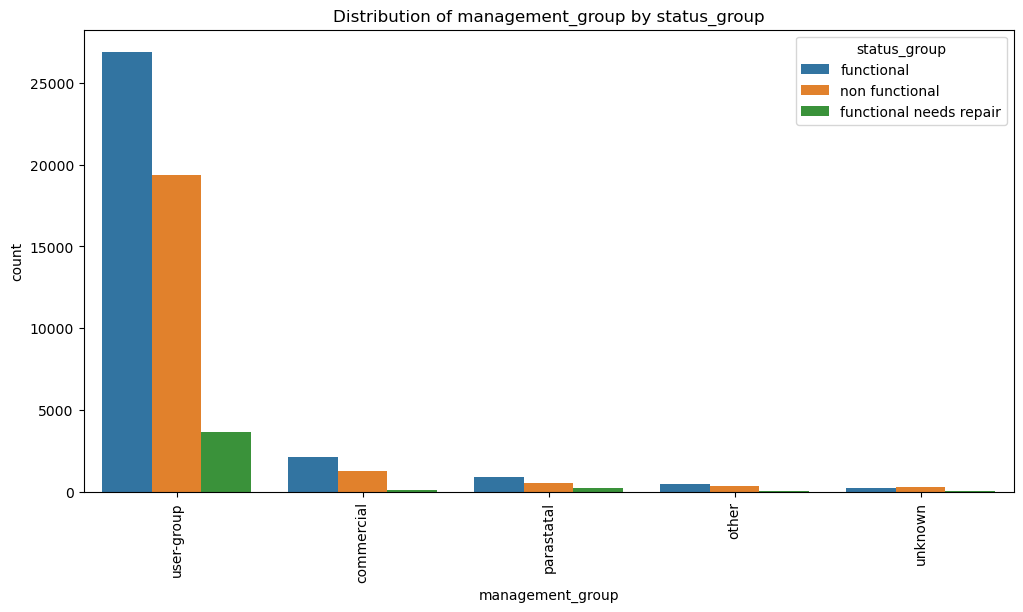

In [94]:
plot_categorical_distribution(dfn, 'management_group')

**payment_type**

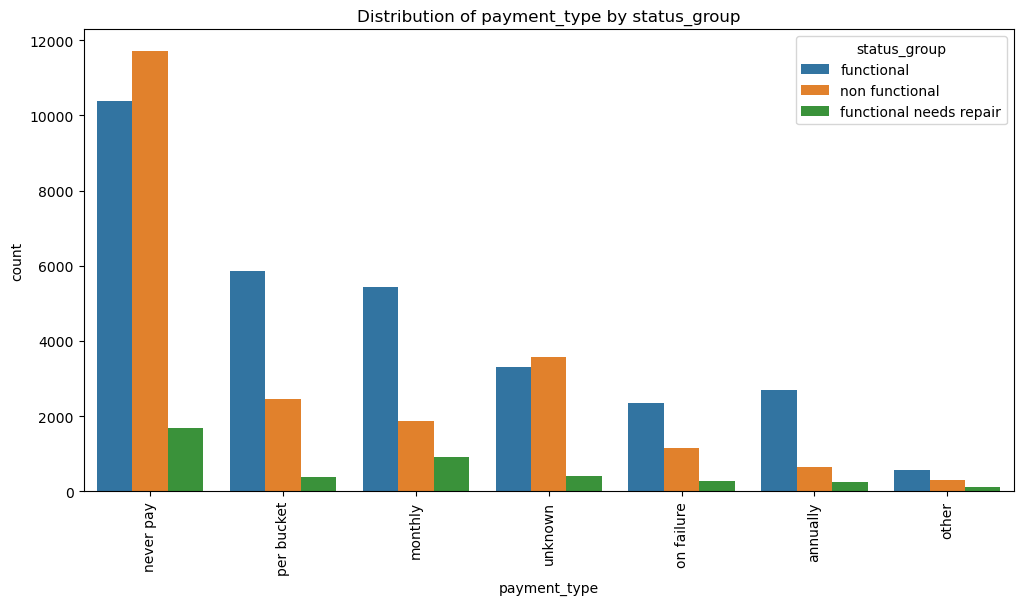

In [95]:
plot_categorical_distribution(dfn, 'payment_type')

**water_quality**

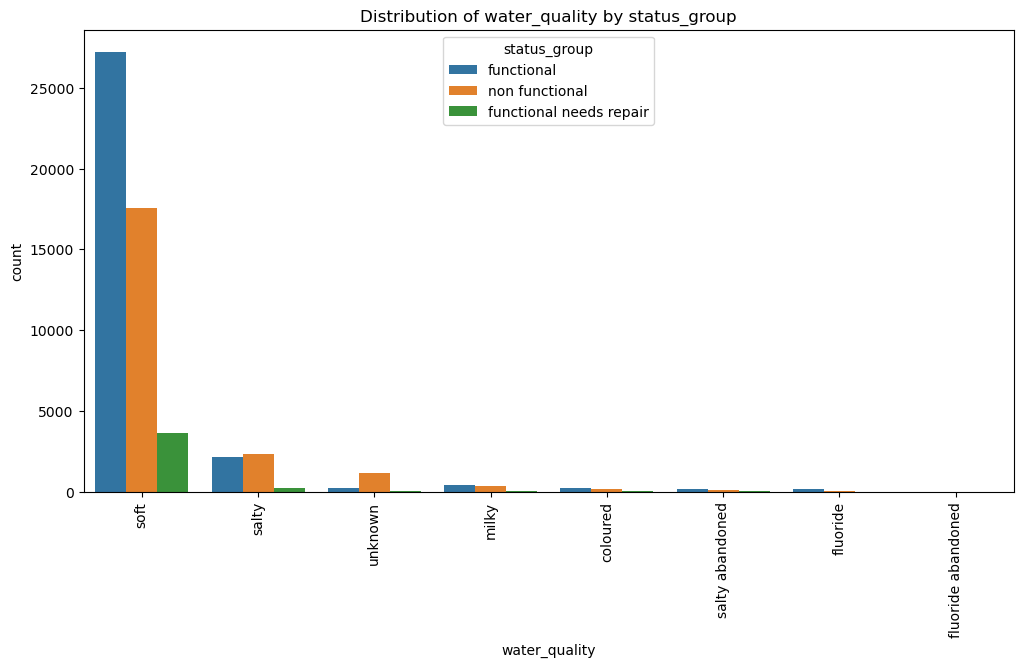

In [96]:
plot_categorical_distribution(dfn, 'water_quality')

**quantity**

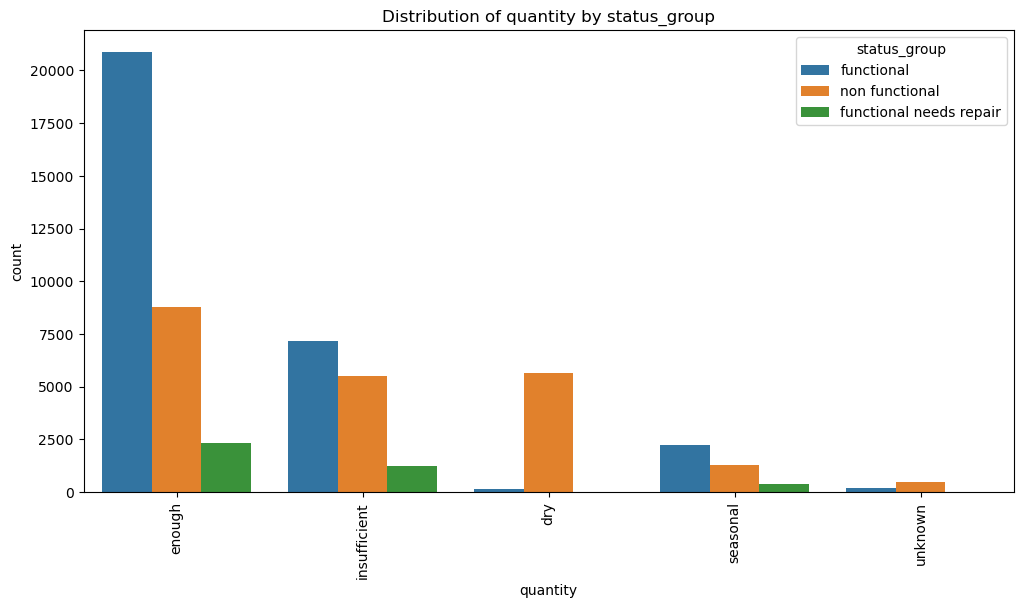

In [97]:
plot_categorical_distribution(dfn, 'quantity')

**source_type**

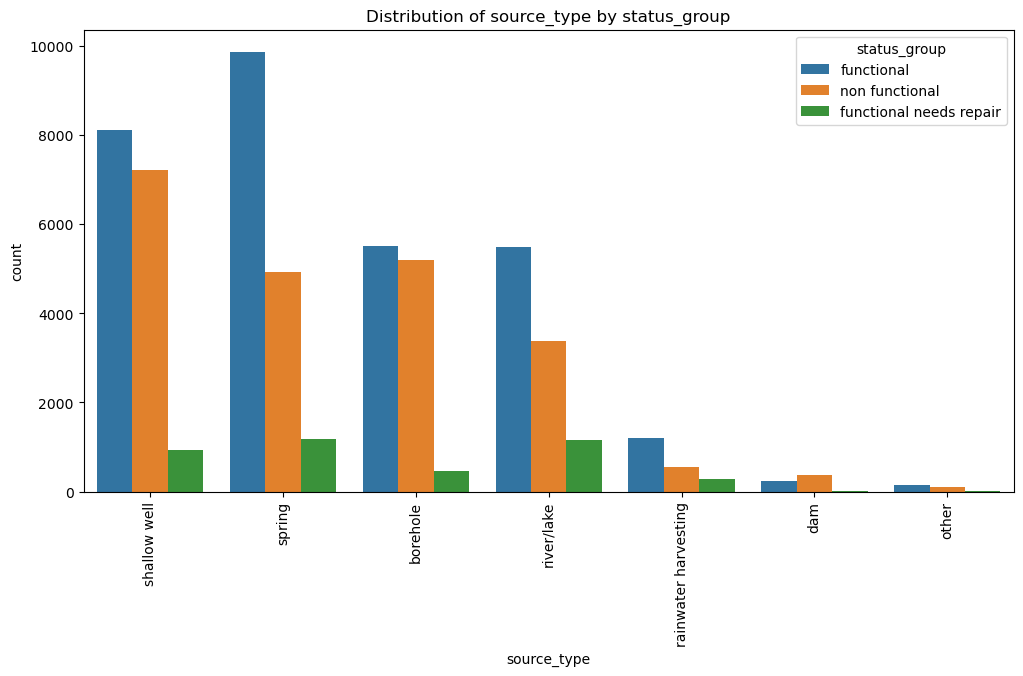

In [98]:
plot_categorical_distribution(dfn, 'source_type')

**waterpoint_type**

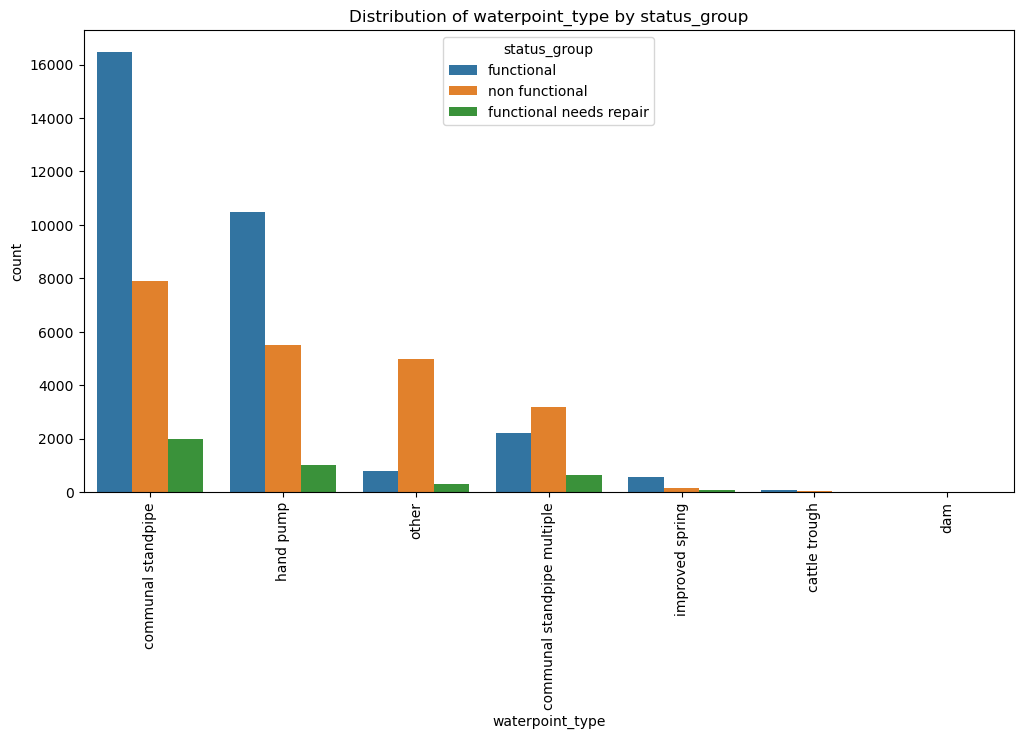

In [99]:
plot_categorical_distribution(dfn, 'waterpoint_type')